<a href="https://colab.research.google.com/github/cc-huang-0716/The-evaluating-of-Stock-price-of-1707.TW/blob/main/1707%E8%82%A1%E5%83%B9%E4%BC%B0%E5%80%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

所需報酬率為= 0.2148
成長率為= 1.1213203435596424
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


the data is been extracted properly
according to DDM,the stock price of 1707.tw in 2025 is : future_price =9.17


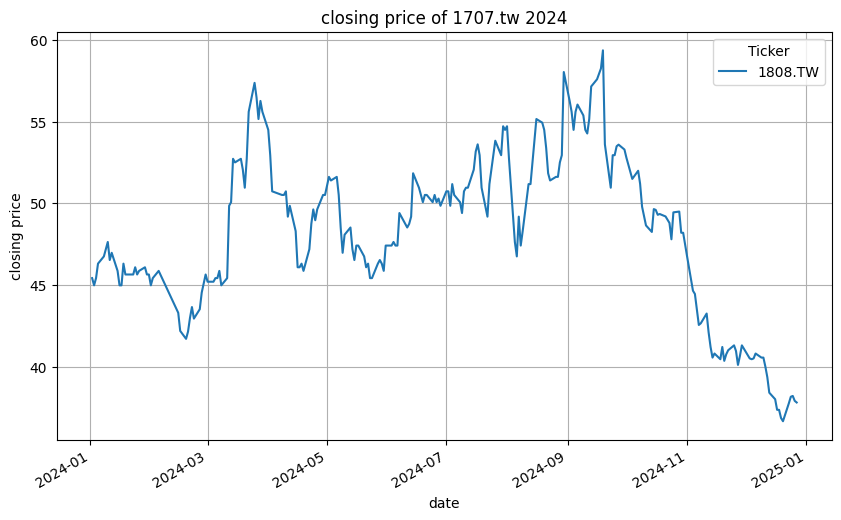

The file waas created successfully：2024_closing_prices.xlsx


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib as plt

#set stock symbol and time period
stock_symbol = "1808.tw"
start_date = "2024-01-01"
end_date = "2024-12-30"
Dividend = 1.867 #using MA(5) method(2024-2019)

#By CAPM model,required rate = 0.0168(台灣十年公債殖利率)+0.603*(0.3452-0.0168)
required_return = 0.2148
print("所需報酬率為=",required_return)

#using gordon model to predict the value of dividend 2025
past_dividend = (2, 0.6, 3) #2024-2022
rate = past_dividend[-1]/past_dividend[0]**(1/(len(past_dividend)-1))-1
print("成長率為=",rate)


#download the data of 1707.tw
data = yf.download(stock_symbol, start = start_date, end = end_date)

#Checking whether the data is been extracted properly
if not data.empty:
  closing_price = data['Close']
  closing_price.to_excel("2024_closing_prices.xlsx")
  print("the data is been extracted properly")

#Using DDM to predict the value of stock of 1707.tw
try:
    future_price = Dividend / (required_return - rate / 100)
    print(f"according to DDM,the stock price of 1707.tw in 2025 is : {future_price =:.2f}")
except ZeroDivisionError:
    print("Please adjust the parameter")

#Data visualization
import matplotlib.pyplot as plt

closing_price.plot(title="closing price of 1707.tw 2024", figsize=(10, 6))
plt.xlabel("date")
plt.ylabel("closing price")
plt.grid()
plt.show()

#Checking whether the excel has been created
import os

# Checking whether the file has been created
file_path = "2024_closing_prices.xlsx"

# Checking whether the file exists or not
if os.path.exists(file_path):
    print(f"The file waas created successfully：{file_path}")
else:
    print(f"The file doesn't exist,please check your coding")



